# Przekształcenia punktowe

W trakcie niniejszego ćwiczenia zapoznamy się z podstawowymi operacjami punktowymi (bezkontekstowymi) przeprowadzanymi na obrazach cyfrowych:
- typu LUT (operacja jednoargumentowa),
- arytmetycznymi (operacje dwuargumentowe): dodawanie, odejmowanie, mnożenie, dzielenie,
- logicznymi (operacje jedno i dwuargumentowe): AND, OR, XOR, NOT.

Na początku zaimportuj potrzebne biblioteki.

In [ ]:
import cv2
import os
import requests
import numpy as np
import matplotlib.pyplot as plt

## Operacja LUT

**Operacja LUT** polega na przekształcaniu wartości poszczególnych pikseli obrazu przy użyciu z góry przygotowanych tabel przekodowań (tabel korekcji).

W przetwarzaniu obrazów najczęściej wykorzystuje się następujące funkcje:
- typu kwadratowa, pierwiastek kwadratowy
- typu logarytm, odwrócony logarytm
- typu wykładnicza,
- inne (np. piłokształtna).

W tym zadaniu zostały dla Państwa przygotowane tablice przekodowania.
Proszę pobrać je z githuba `https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lut.py` (można użyć znanej biblioteki request), a następnie zaimportować je poleceniem `import lut`.
Od tego momentu można się do nich odwoływać w następujący sposób: `lut.log` itd.

In [ ]:
url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = 'lut.py'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Wyświetl przykładowe przekodowanie wykorzystując funkcję `plt.plot(lut.kwadratowa)`.

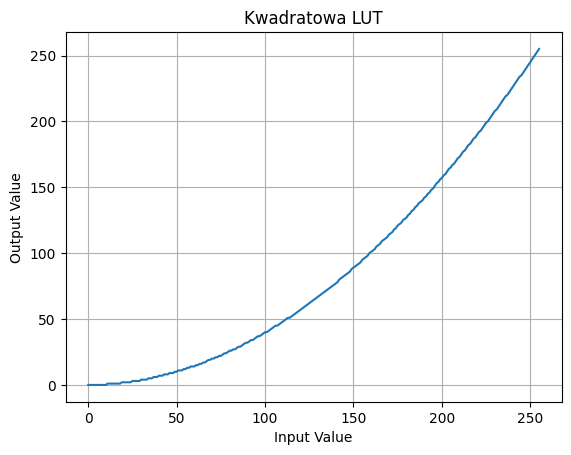

In [ ]:
import lut

plt.plot(lut.kwadratowa)
plt.title('Kwadratowa LUT')
plt.xlabel('Input Value')
plt.ylabel('Output Value')
plt.grid(True)
plt.show()

Wybierz jeden z obrazów: _lena.bmp_ lub _jet.bmp_ (w razie potrzeby pobierz go z githuba):
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/lena.bmp
- https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/jet.bmp

Wczytaj go i wyświetl.

In [ ]:
fileName = 'lena.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

fileName = 'jet.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

Na wybranym obrazie wykonaj operację LUT.
Służy do tego funkcja `cv2.LUT` przyjmująca dwa argumenty: obraz oraz tablicę przekodowania.
Wybierz dowolną z zaimportowanych tablic i wyświetl wynikowy obraz.

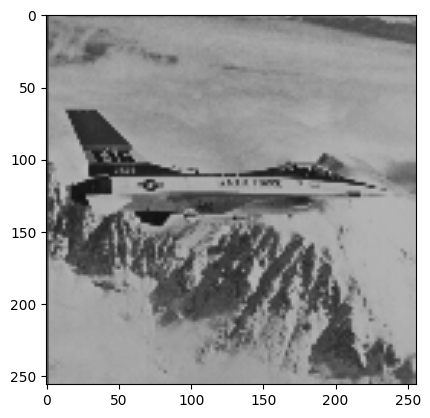

In [ ]:
I = cv2.imread('jet.bmp')
I_lut = cv2.LUT(I, lut.wykladnicza)
#I_lut = cv2.LUT(I, lut.odwlog)
#I_lut = cv2.LUT(I, lut.kwadratowa)
plt.imshow(I_lut)
plt.show()

Aby lepiej zobaczyć w jaki sposób działają różne przekodowania LUT, skonstruujemy funkcję, która jako argumenty pobierać będzie obrazek oryginalny oraz tablicę przekodowania, a następnie na wspólnym rysunku będzie wyświetlać: funkcję, obraz wejściowy oraz wynik przekodowania.

Przypomnienie składni tworzenia funkcji w pythonie:
```{python}
  def nazwa_funkcji(para, metry):
  	# cialo funkcji
```

  - Stwórz nową funkcję i nazwij ją LUT.
  - Funkcja powinna przyjmować dwa parametry: obraz oraz tablicę przekodowania.
  - W ciele funkcji wykonaj przekodowanie LUT, podobnie jak wcześniej w przykładzie.
  - Funkcja powinna wyświetlić wykres składający się z 3 umieszczonych obok siebie pól: wykres przekodowania, obraz oryginalny oraz obraz przekształcony.
    Każdy z wykresów powinien być podpisany.
    _(W razie problemów można przypomnieć sobie te zagadnienia z laboratorium wprowadzającego)_
  - Jeśli wykres przekodowania jest zbyt rozciągnięty, można go wyrównać, np. `ax2.set_aspect('equal')`.

In [ ]:
def LUT(image, lut_table):
    image_transformed = cv2.LUT(image, np.array(lut_table, dtype=np.uint8))
    fig, axs = plt.subplots(1, 3, figsize=(15, 5))

    axs[0].plot(lut_table)
    axs[0].set_title('Funkcja LUT')
    axs[0].set_xlabel('Input Value')
    axs[0].set_ylabel('Output Value')
    axs[0].grid(True)
    axs[0].set_aspect('equal')

    axs[1].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[1].set_title('Oryginalny obraz')
    axs[1].axis('off')

    axs[2].imshow(cv2.cvtColor(image_transformed, cv2.COLOR_BGR2RGB))
    axs[2].set_title('Obraz po przekształceniu LUT')
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()

Wywołaj przygotowaną funkcję dla każdego z przekształceń.
W wyniku powinno powstać 7 wykresów.

Przekształcenie: Kwadratowa


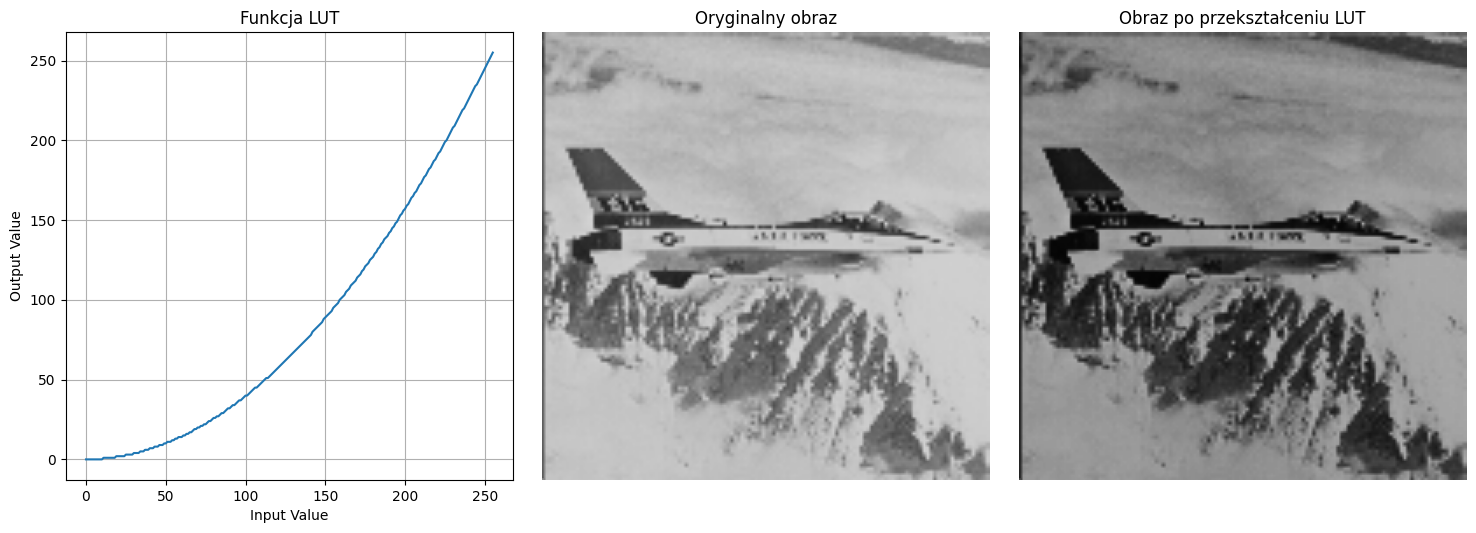

Przekształcenie: Pierwiastek kwadratowy


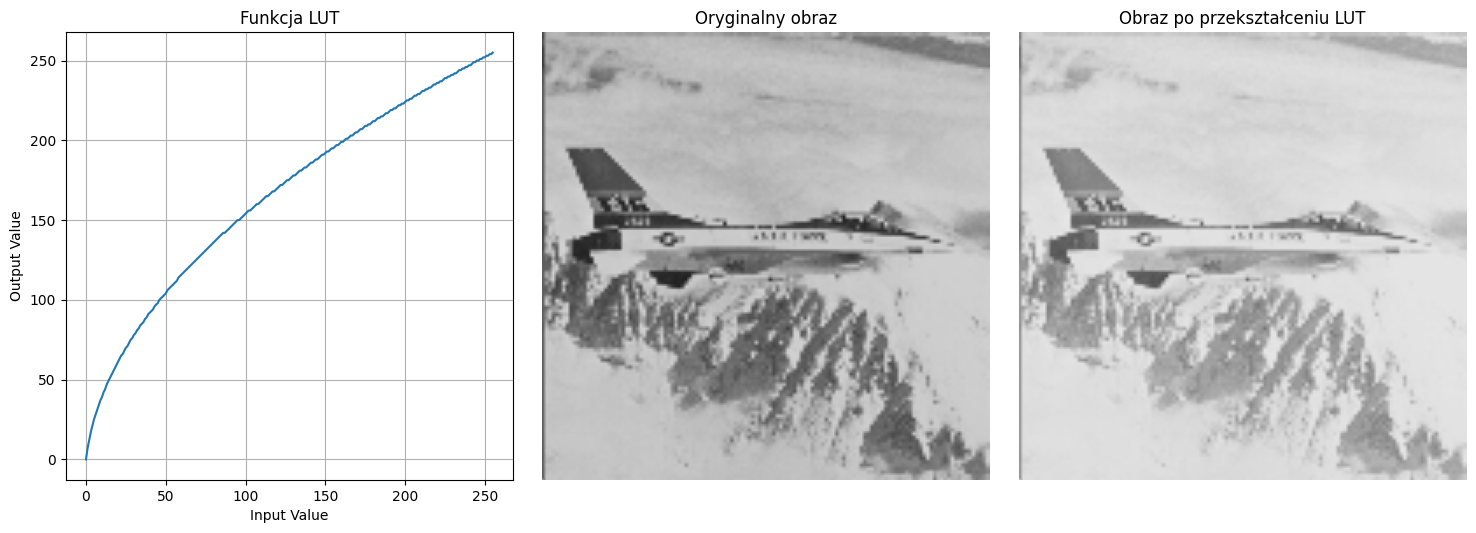

Przekształcenie: Logarytm


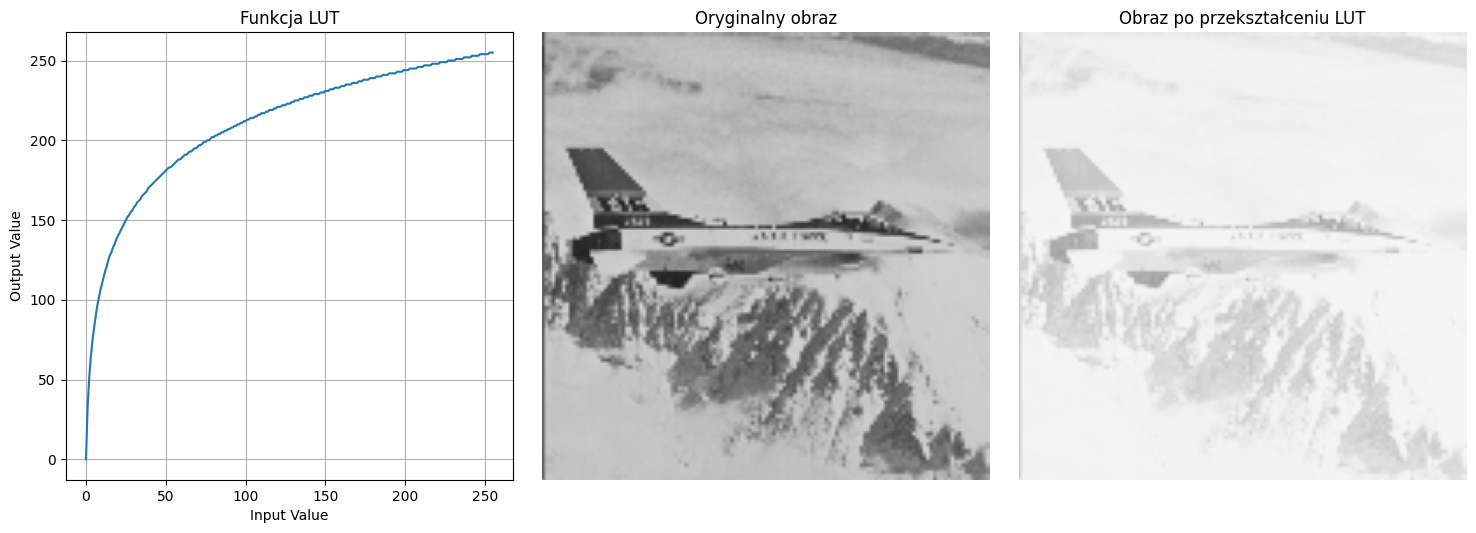

Przekształcenie: Odwrócony logarytm


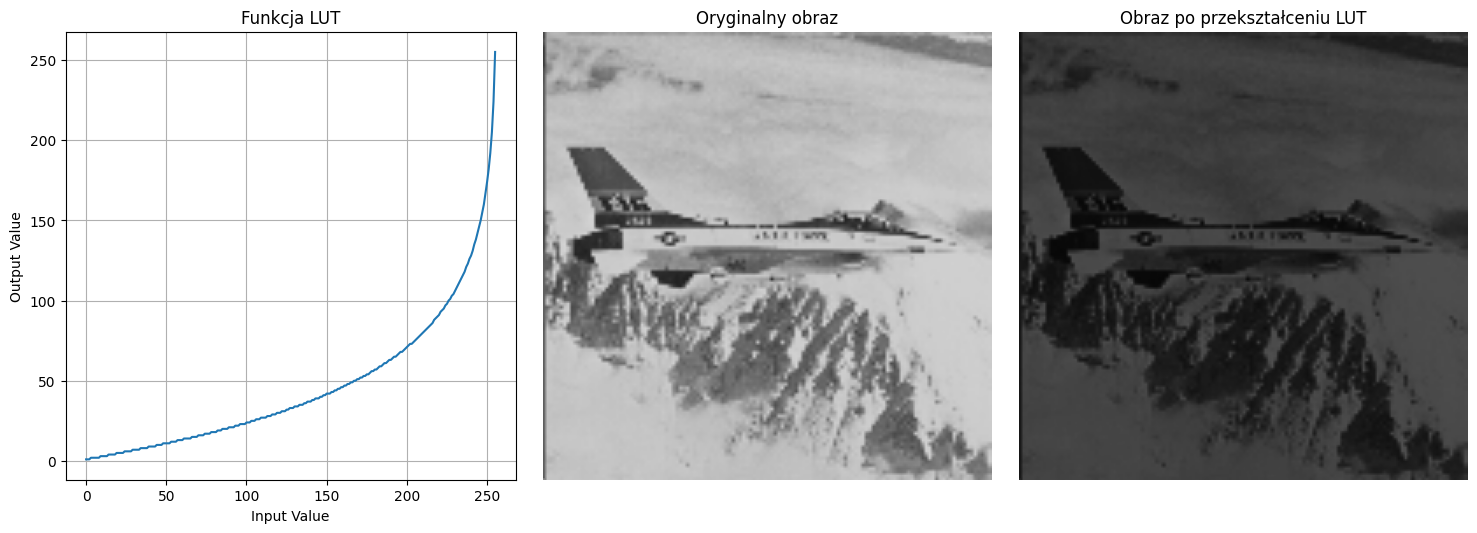

Przekształcenie: Wykładnicza


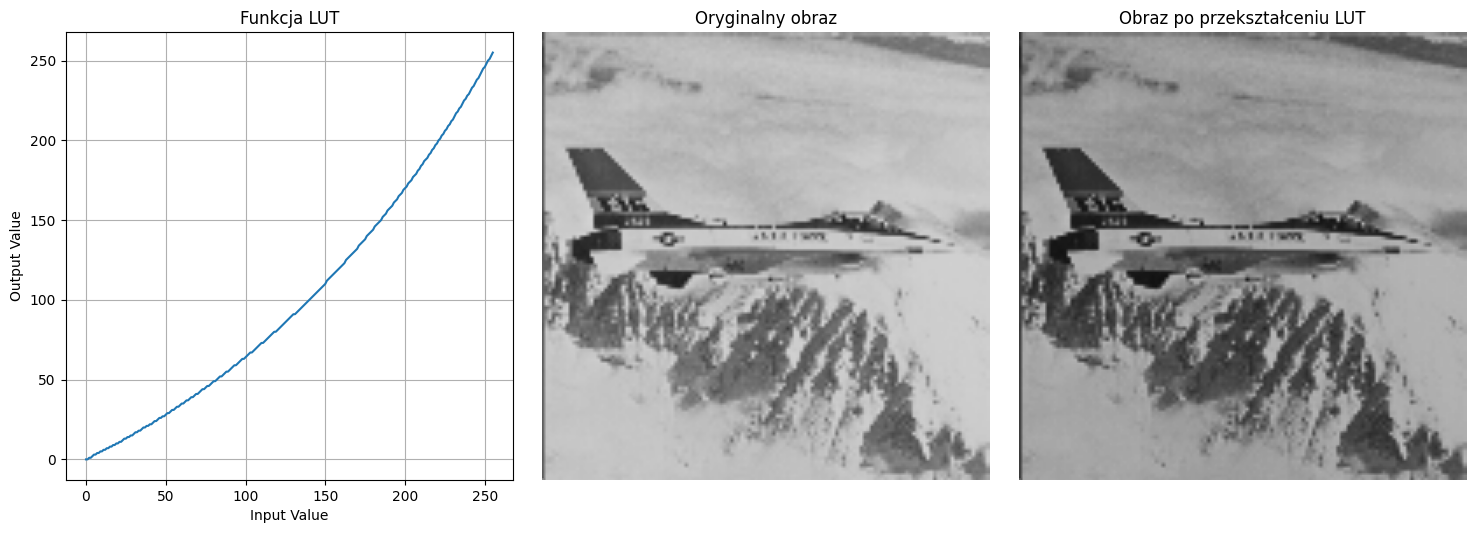

Przekształcenie: Piła


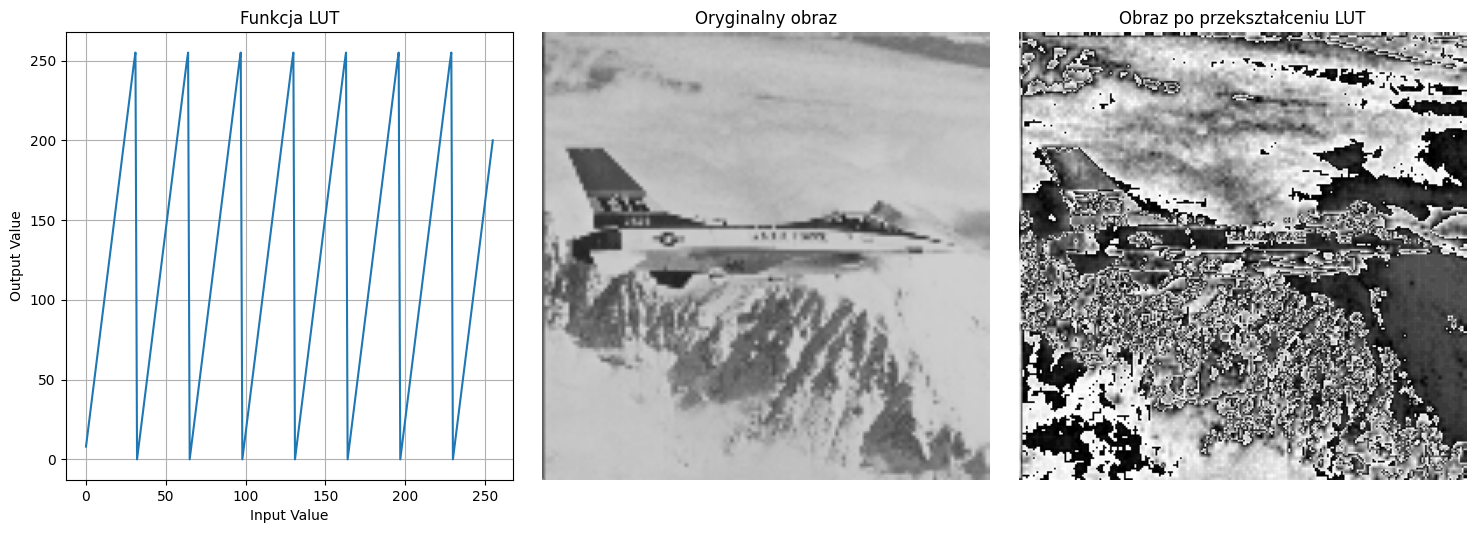

Przekształcenie: Odwrotna


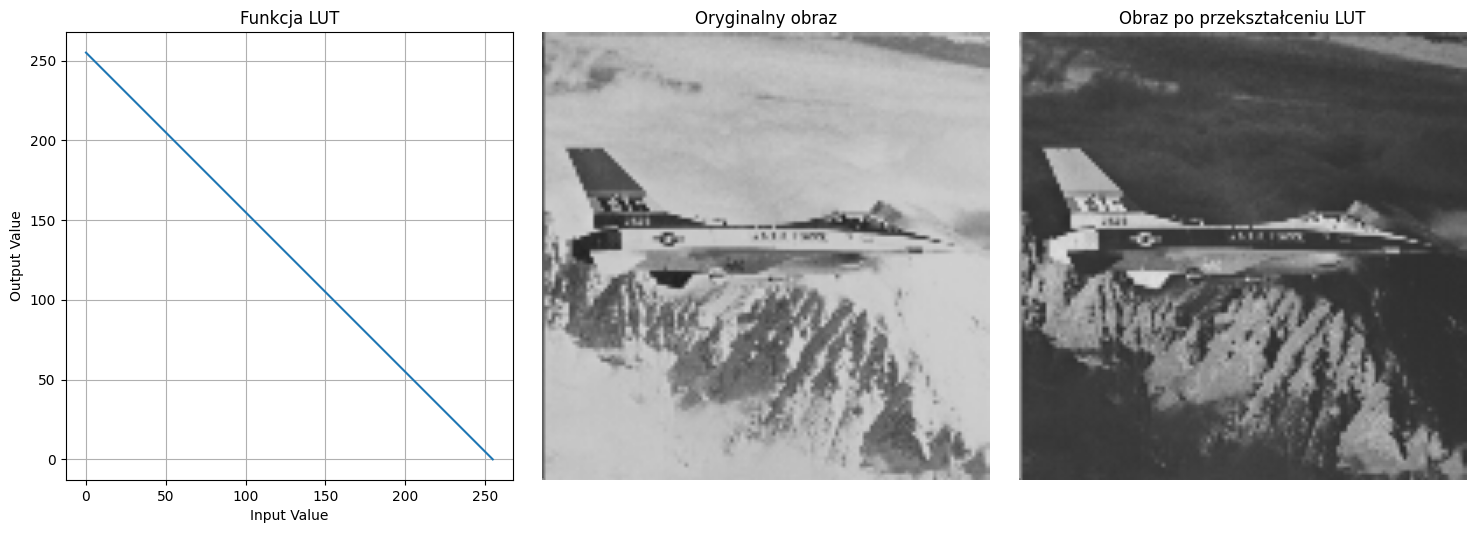

In [ ]:
lut_tables = [
    ("Kwadratowa", lut.kwadratowa),
    ("Pierwiastek kwadratowy", lut.pierwiastkowa),
    ("Logarytm", lut.log),
    ("Odwrócony logarytm", lut.odwlog),
    ("Wykładnicza", lut.wykladnicza),
    ("Piła", lut.pila),
    ("Odwrotna", lut.odwrotna)
]

for name, lut_table in lut_tables:
    print(f'Przekształcenie: {name}')
    LUT(I, lut_table)

## Operacja arytmetyczne

### Dodawanie

Wczytaj dwa obrazy _lena.bmp_ i _jet.bmp_ i wyświetl je.

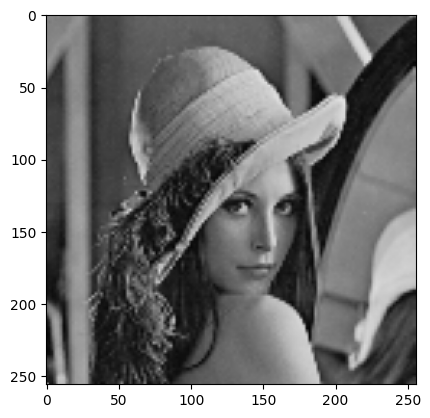

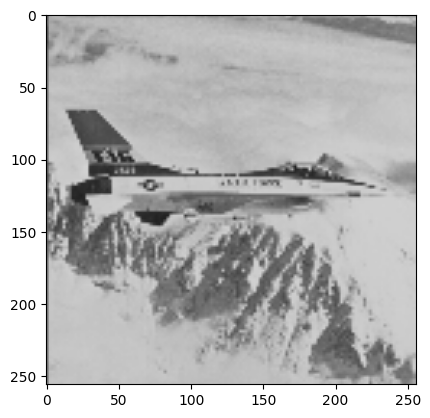

In [ ]:
lena = cv2.imread('lena.bmp')
jet = cv2.imread('jet.bmp')

plt.imshow(lena)
plt.show()
plt.imshow(jet)
plt.show()

Dodaj obrazy _lena_ i _jet_, wykorzystaj funkcję `cv2.add`.
Uzyskany wynik wyświetl.

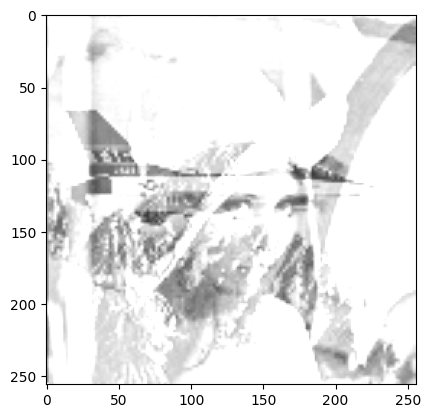

In [ ]:
I_added = cv2.add(lena, jet)
plt.imshow(I_added)

Czy wynik sumowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Spróbuj wykonać dodawanie ponownie wykorzystując typ uint16 (`jet.astype('uint16')`) dla arguemntów dodawania.
Wynikowy obraz należy przeskalować do zakresu 0-255, zamienić na typ uint8 i wyświetlić.
**Uwaga: operacja ta jest użyteczna w przypadku, gdy dane do wyświetlenia wykraczają poza zakres 0-255, w przeciwnym przypadku jej wykorzystanie może zniekształcić wyniki.**

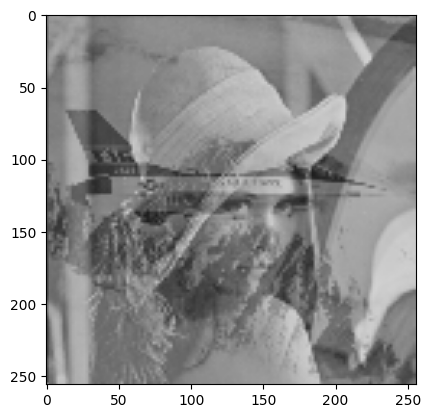

In [ ]:
I_added_scale = cv2.add(lena.astype('uint16'), jet.astype('uint16'))
I_added_scale = (I_added_scale/2).astype('uint8')
plt.imshow(I_added_scale)

### Kombinacja liniowa

Do wykonywania operacji kombinacji liniowej służy funkcja `cv2.addWeighted`.
Zapoznaj się z dokumentacją tej funkcji i przetestuj kilka kombinacji liniowych obrazów _lena_ i _jet_.
Wyświetl wynik dowolnej z nich.

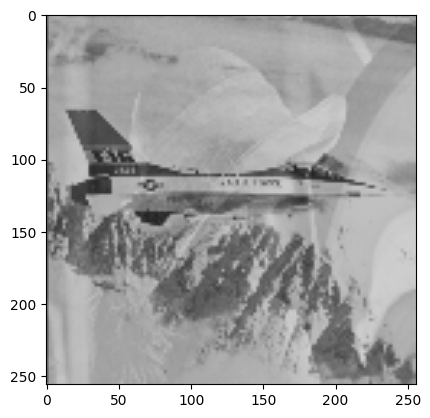

In [ ]:
#I_weigted = cv2.addWeighted(lena, 0.9, jet, 0.1, 0.4)
#plt.imshow(I_weigted)
I_weigted_2 = cv2.addWeighted(lena, 0.2, jet, 0.8, 0.0)
plt.imshow(I_weigted_2)

### Odejmowanie

Wykorzystując funkcję `cv2.subtract` odejmij obrazy _lena_ i _jet_.

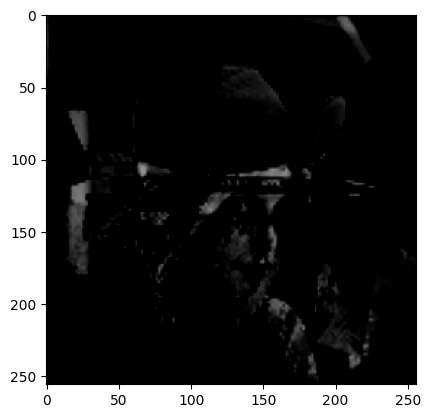

In [ ]:
I_sub = cv2.subtract(lena, jet)
plt.imshow(I_sub)

Czy wynik odejmowania jest satysfakcjonujący?
Co może niekorzystnie wpływać na rezultat operacji?
Często zamiast zwykłego odejmowania wykorzystuje się operację wartość bezwzględna z różnicy (pozwala to między innymi uniknąć pokazanych powyżej problemów).
Zamień typ argumentów _lena_ i _jet_ z uint8 na **int16**, odejmij je od siebie, a następnie wykorzystując funkcję `np.abs` wykonaj operację wartość bezwzględna z różnicy.
Wyświetl ten obraz.
Zastanów się, dlaczego ta zmiana poprawia wynik odejmowania?

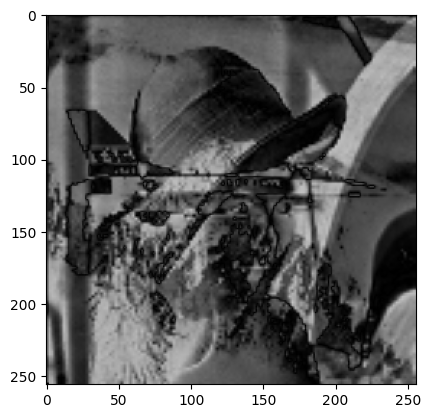

In [ ]:
I_sub2 = cv2.subtract(jet.astype('int16'), lena.astype('int16'))
I_sub2 = np.abs(I_sub2).astype('uint8')
plt.imshow(I_sub2)

# np. w. piksela wynosi 100, a w drugim 150, wynik odejmowania to -50, ale w typie uint8 zostanie on zaokrąglony do 0.

### Mnożenie

Mnożenie dwóch obrazów pozwala wykonać funkcja `cv2.multiply`.
Wykonaj mnożenie obrazów _lena_ i _jet_.
Czy wynik takiej operacji zawiera jakąś istotną informację?
Dlaczego?

Przed wykonaniem mnożenia zamień typ arguemntów na **float64**. Wynik mnożenia przeskaluj do zakresu 0-255, a następnie zrzutuj na typ **uint8**.

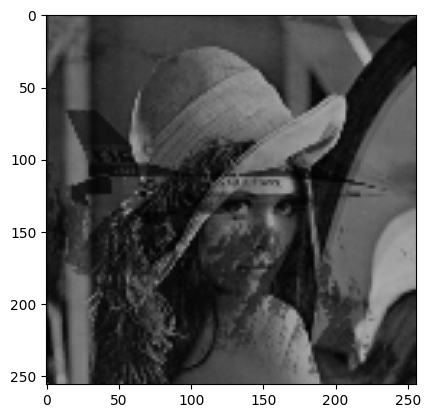

In [ ]:
I_multiply = cv2.multiply(lena.astype('float64'), jet.astype('float64'))
I_multiply = (I_multiply / 255).astype('uint8')
plt.imshow(I_multiply)

Mnożenie częściej wykorzystuje się jako:
  + mnożenie przez stałą $-$ co powoduje ogólne rozjaśnienie albo ściemnienie obrazu,
  + mnożenie przez maskę $-$ czyli obraz binarny.

Wczytaj maskę _kolo.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kolo.bmp).
Przemnóż wybrany obraz przez maskę i wyświetl wynik.
Mnożenie przez maskę można zrealizować za pomocą funkcji `cv2.multiply`, ale maskę należy należy najpierw przekształcić z zakresu 0-255 do 0-1, na przykład `(maska).astype('bool').astype('uint8')`.

In [ ]:
fileName = 'kolo.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

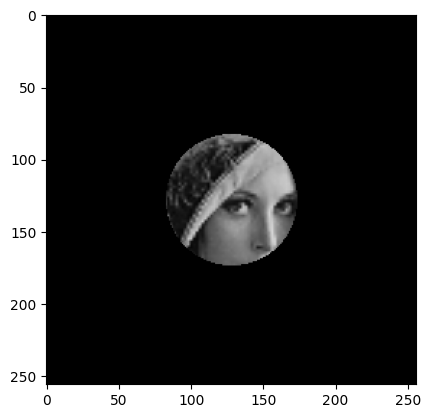

In [ ]:
#I_mask = cv2.imread('kolo.bmp')
#I_mask = cv2.multiply(I_mask.astype('bool').astype('uint8'), jet)
#plt.imshow(I_mask)

I_mask = cv2.imread('kolo.bmp')
I_mask = cv2.multiply(I_mask.astype('bool').astype('uint8'), lena)
plt.imshow(I_mask)

### Negatyw

Negatyw obrazu uzyskuje się za pomocą funkcji `cv2.bitwise_not(img)`
Negatyw obrazu można również uzyskać wykorzystując przekodowanie LUT.
Można w tym celu posłużyć się przygotowaną wcześniej tablicą `lut.odwrotna`.
Przetestuj działanie tych funkcji i wykonaj negatyw obrazu _lena_ dowolnym sposobem.

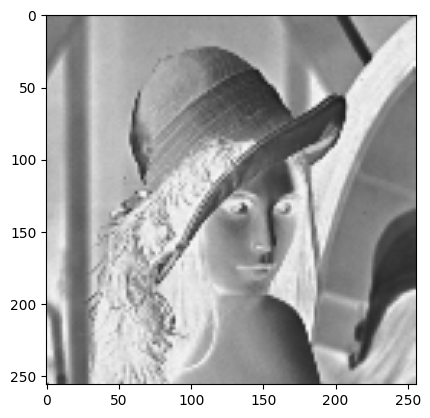

In [ ]:
I_inv = cv2.imread('lena.bmp')
I_inv = cv2.bitwise_not(I_inv)
plt.imshow(I_inv)

## Operacje logiczne

Na poszczególnych punktach obrazu (najczęściej binarnego $-$ czyli składającego się z dwóch kolorów: czarnego i białego) można wykonywać operacje logiczne: NOT, AND, OR, XOR itp.
Wczytaj dwa obrazy: _kolo.bmp_ i _kwadrat.bmp_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/kwadrat.bmp), następnie wyświetl je.

In [ ]:
fileName = 'kwadrat.bmp'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

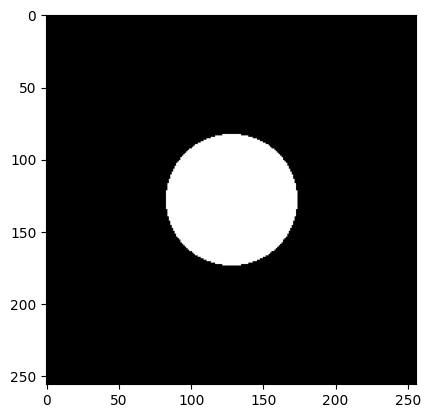

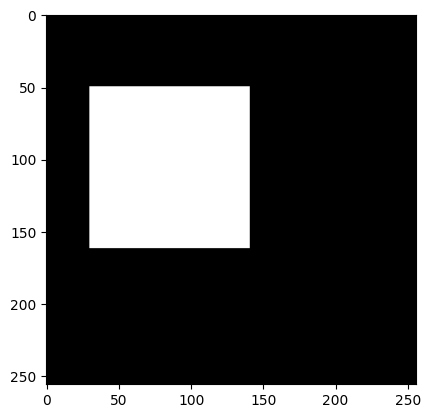

In [ ]:
I_circle = cv2.imread('kolo.bmp')
I_square = cv2.imread('kwadrat.bmp')

plt.imshow(I_circle)
plt.show()
plt.imshow(I_square)
plt.show()

Na wczytanych obrazach wykonaj wybrane operacje logiczne: NOT (operator `~`), AND (`&`), OR (`|`), XOR (`^`).
Operator `~` jest jednoargumentowy, wszystkie pozostałe są dwuargumentowe.
Alternatywnym sposobem jest wykorzystanie funkcji z biblioteki opencv: `cv2.bitwise_not`, `cv2.bitwise_and`, `cv2.bitwise_or`, `cv2.bitwise_xor`.
Wyświetl rezultaty.

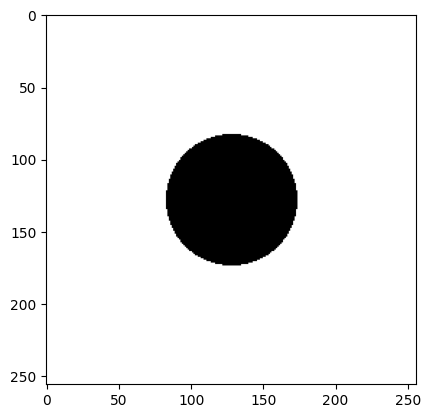

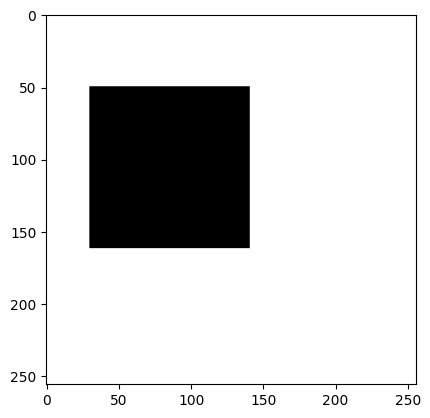

In [ ]:
#NOT
I_circle_not = cv2.bitwise_not(I_circle)
I_square_not = cv2.bitwise_not(I_square)

plt.imshow(I_circle_not)
plt.show()
plt.imshow(I_square_not)
plt.show()

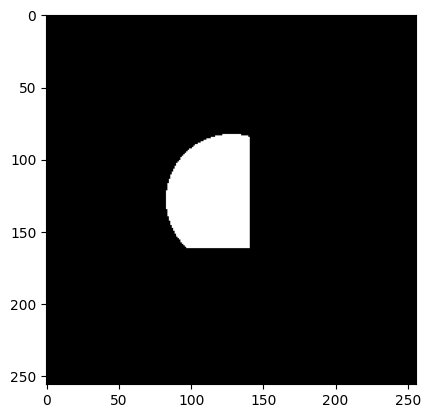

In [ ]:
#AND
I_circle_and_square = cv2.bitwise_and(I_circle, I_square)
plt.imshow(I_circle_and_square)

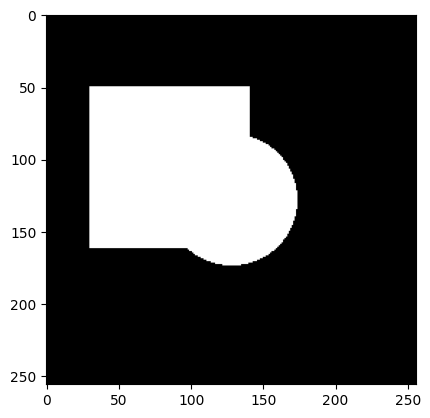

In [ ]:
#OR
I_circle_or_square = cv2.bitwise_or(I_circle, I_square)
plt.imshow(I_circle_or_square)

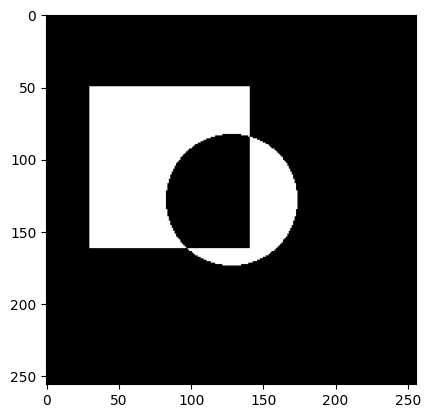

In [ ]:
#XOR
I_circle_xor_square = cv2.bitwise_xor(I_circle, I_square)
plt.imshow(I_circle_xor_square)